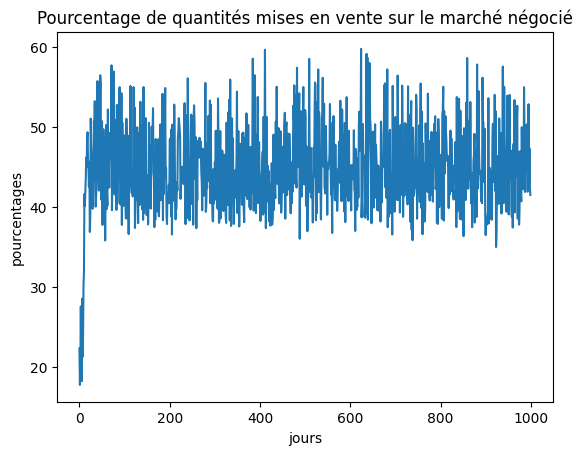

In [47]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

class marché():
    def __init__(self,prix_a,prix_n):
        self.prix_a=prix_a
        self.prix_n=prix_n
    
    # Codes pour les vendeurs
    def revision_vend(self,p_t,offre_1_t,offre_2_t,dict,coeff=0.1):
        offre=offre_1_t+offre_2_t
        p=[]
        for i in range(200):
            if len(dict[i])!=0:
                D_sum_r=sum(a[1] for a in dict[i])
                D_sum_c=sum(a[2] for a in dict[i])
                P_r=p_t[i][0]*(1+coeff*np.tanh(D_sum_r/offre[i][0]-1))    
                P_c=p_t[i][1]*(1+coeff*np.tanh(D_sum_c/offre[i][1]-1))
            else:
                P_r=p_t[i][0]
                P_c=p_t[i][1]
            p.append((P_r,P_c))
        return(p)

    def profit_t(self,p_t,offre_1_t,offre_2_t):
        offre=offre_1_t+offre_2_t
        profit=[]
        for i in range(len(p_t)):
            p_1=offre[i][1]*p_t[i][1]+offre[i][0]*p_t[i][0]            
            profit.append(p_1)
        return(profit)

    def rapports_t(self,p_t_n,offre_1_t,offre_2_t):
        profits_n=self.profit_t(p_t_n,offre_1_t,offre_2_t)
        profits_a=self.profit_t(self.prix_a,offre_1_t,offre_2_t)
        R=[]
        for i in range (200):
            r=(profits_a[i]-profits_n[i])/(profits_a[i]+profits_n[i])
            R.append(r)
        return(R)

    def marchés_t(self,R_t):
        marchés=[]
        for r in R_t:
            if r==-1:
                marchés.append("négocié")
            elif r<-0.5:
                marchés.append(Ber(0.25))
            elif r<=0:
                marchés.append(Ber(0.5))
            elif r<0.5:
                marchés.append(Ber(0.75))
            else:
                marchés.append("encheres")
        return(marchés)

    def offre_en_négocié(self,marchés,offre_1_t,offre_2_t):
        offre=offre_1_t+offre_2_t
        S=0
        for i in range (200):
            if marchés[i]=="négocié":
                S+=offre[i][0]+offre[i][1]
        return S
    
    def marché_offre_t(self,offre_1_t,offre_2_t,R_t,prix_n):
        offre=offre_1_t +offre_2_t
        dict={}
        for i in range(200):
            dict[i]=(self.marchés_t(R_t)[i], offre[i][0], offre[i][1],prix_n[i][0],prix_n[i][1])
        return(dict)
    
    # Codes pour les acheteurs
    def revision_achet(self,dict_achet,prix_n):     
        s_r_n=0
        s_c_n=0
        keys_n=[]
        s_r_a=0
        s_c_a=0
        keys_a=[]
        for key,elem in dict_achet.items():
            if elem[0]=="négocié":
                s_r_n+=elem[1]
                s_c_n+=elem[2]
                keys_n.append(key)
            else:
                s_r_a+=elem[1]
                s_c_a+=elem[2]
                keys_a.append(key)
        p_r_n=sum(((prix_n[key][0]*dict_achet[key][1])/s_r_n) for key in keys_n)
        p_c_n=sum(((prix_n[key][1]*dict_achet[key][2])/s_c_n) for key in keys_n)       
        p_r_a=sum(((self.prix_a[key][0]*dict_achet[key][1])/s_r_a) for key in keys_a)
        p_c_a=sum(((self.prix_a[key][1]*dict_achet[key][2])/s_c_a) for key in keys_a)
        return([(p_r_n,p_c_n)]*100,[(p_r_a,p_c_a)]*100)

    def couts(self,demande,reserve):
        couts=[]
        for i in range(100):
            c=demande[i][0]*reserve[i][0]+demande[i][1]*reserve[i][1]
            couts.append(c)
        return (couts)
    
    def rapport_achet(self,reserve_n,reserve_a):
        rapports=[]
        for i in range (100):
            couts_n=self.couts(demande,reserve_n)
            couts_a=self.couts(demande,reserve_a)
            rapports.append((couts_n[i]-couts_a[i])/(couts_a[i]+couts_n[i]))
        return(rapports)
    
    def dict_achet(self,rapp,demande,reserve_n):
        dict={}
        marchés=self.marchés_t(rapp)
        for i in range(100):
            dict[i]=(marchés[i],demande[i][0],demande[i][1],reserve_n[i][0],reserve_n[i][1])
        return(dict)

def transactions_négocié(dict_achet,dict_vend,k=3):
    dicti={}
    for i in range(200):
        dicti[i]=[]
    for key,elem in dict_achet.items():
        if elem[0]=="négocié":
            i=0
            d_r=elem[1]
            d_c=elem[2]
            while i<=k and d_r>0 :                
                v=rd.randint(0,199)
                if (key,elem[1],elem[2]) not in dicti[v]:
                    dicti[v].append((key,elem[1],elem[2]))
                    if dict_vend[v][3]<=dict_achet[key][3]:
                        d_r=max(d_r-dict_vend[v][1],0)
                    if dict_vend[v][4]<=dict_achet[key][4]:
                        d_c=max(d_c-dict_vend[v][2],0)
                    i=i+1
    return(dicti)

def Ber(param):
    s=0
    for i in range(100):
        s+=rd.random()
    if s/100<param:
        return("encheres")   
    return("négocié") 



# test
prix_n=[(11,6)]*200
prix_a=[(6,3)]*200
reserve_n=[(2,2)]*100
reserve_a=[(2,2)]*100
ma=marché(prix_n,prix_a)
pourcentages=[]
demande=[(rd.randint(200,400),rd.randint(150,400)) for i in range(100)]
for i in range (1000):
    offre_1_t=[(rd.randint(100,200),rd.randint(50,100))for i in range(100)]
    offre_2_t=[(rd.randint(50,100),rd.randint(200,400))for i in range(100)]
    total=sum(offre_2_t[0])+sum(offre_2_t[1])+sum(offre_1_t[0])+sum(offre_2_t[1])
    R_t=ma.rapports_t(prix_n,offre_1_t,offre_2_t)
    R1_t=ma.rapport_achet(reserve_n,reserve_a)
    marchés_vend=ma.marchés_t(R_t)
    marchés_achet=ma.marchés_t(R1_t)
    offre_n=ma.offre_en_négocié(marchés_vend,offre_1_t,offre_2_t)
    pourcentage_n=offre_n/total
    pourcentages.append(pourcentage_n)
    d1=ma.dict_achet(R1_t,demande,reserve_n)
    d2=ma.marché_offre_t(offre_1_t,offre_2_t,R_t,prix_n)
    dicti=transactions_négocié(d1,d2,k=3)
    reserve_n,reserve_a=ma.revision_achet(d1,prix_n)   
    prix_n=ma.revision_vend(prix_n,offre_1_t,offre_2_t,dicti,coeff=0.4)  
    demande=[(rd.randint(200,400),rd.randint(150,400)) for i in range(100)]

plt.plot([i for i in range(1000)],pourcentages)
plt.xlabel("jours")
plt.ylabel("pourcentages")
plt.title("Pourcentage de quantités mises en vente sur le marché négocié")
plt.show()